# Titanic project

In [426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [427]:
traindata = pd.read_csv (r"C:\Users\Zaher1\Downloads\train.csv")
testdata = pd.read_csv (r"C:\Users\Zaher1\Downloads\test.csv")

In [428]:
traindata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [429]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [430]:
traindata.shape

(891, 12)

In [431]:
nulldata= traindata.isnull().sum()
nulldata[nulldata>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<Axes: >

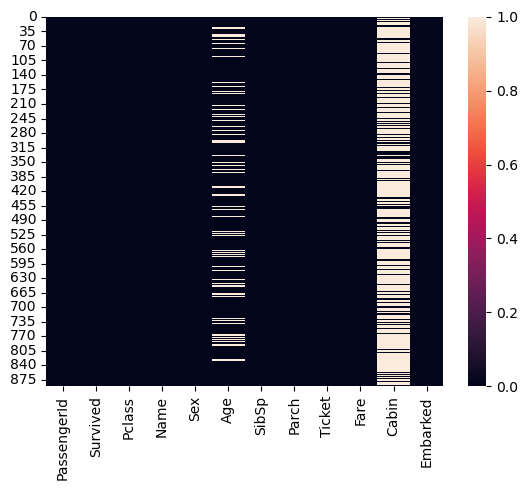

In [432]:
sns.heatmap(traindata.isnull())

# Clean data

In [434]:
traindata



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: >

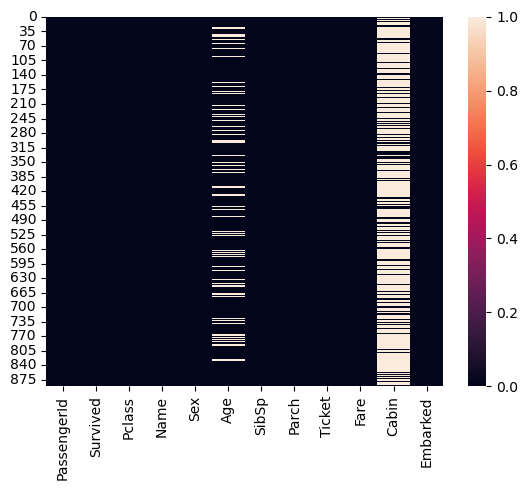

In [435]:
sns.heatmap(traindata.isnull())

In [436]:
def clean(d):
        d.drop(['Cabin', 'Name', 'Embarked', 'Fare', 'Ticket']) 
        d.Age = d.Age.fillna(d.Age.median())
        d.dropna()
        return d



In [437]:
traindata.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [438]:
traindata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [439]:
traindata.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [440]:
traindata.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


<Axes: >

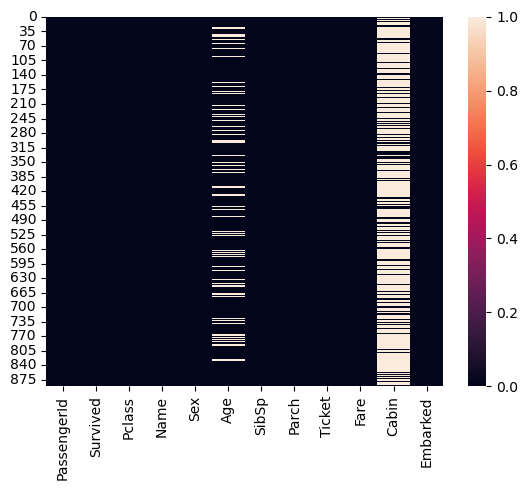

In [441]:
sns.heatmap(traindata.isnull())

In [442]:
def clean(d):
        d.drop(['Cabin', 'Name', 'Embarked', 'Fare', 'Ticket'],axis=1, inplace= True) 
        d.Age = d.Age.fillna(d.Age.median())
        d.dropna()
        return d 
   

In [374]:
 clean (testdata)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0
414,1306,1,female,39.0,0,0
415,1307,3,male,38.5,0,0
416,1308,3,male,27.0,0,0


In [375]:
testdata

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0
414,1306,1,female,39.0,0,0
415,1307,3,male,38.5,0,0
416,1308,3,male,27.0,0,0


In [376]:
testdata.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

In [377]:
correlation = traindata.select_dtypes(include=['number'])

In [378]:
correlation.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [379]:
traindata.drop(['Fare'],axis=1, inplace= True)


<Axes: >

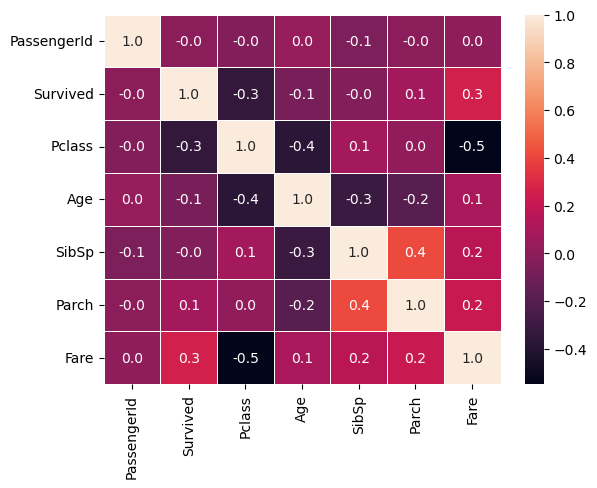

In [459]:
sns.heatmap(correlation.corr(), annot= True, fmt='.1f', linewidth=.5)

In [461]:
traindata.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='count'>

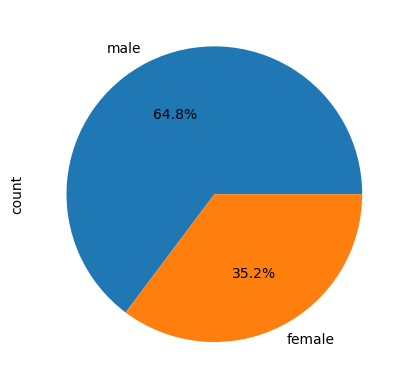

In [382]:
traindata.Sex.value_counts().plot.pie(autopct='%0.1f%%')

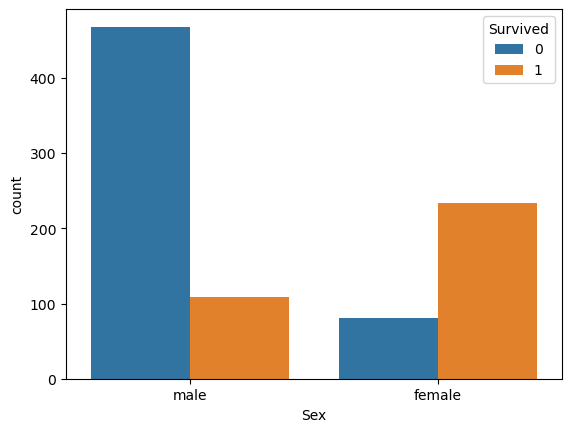

In [383]:
sns.countplot(x='Sex', hue='Survived', data=traindata)
plt.show()


<Axes: ylabel='count'>

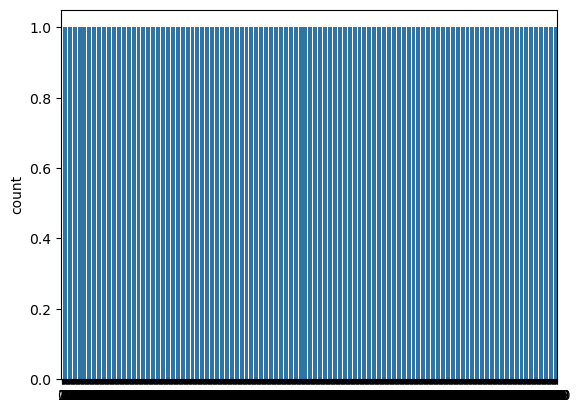

In [384]:
sns.countplot (traindata.Pclass)

<Axes: xlabel='Age', ylabel='Count'>

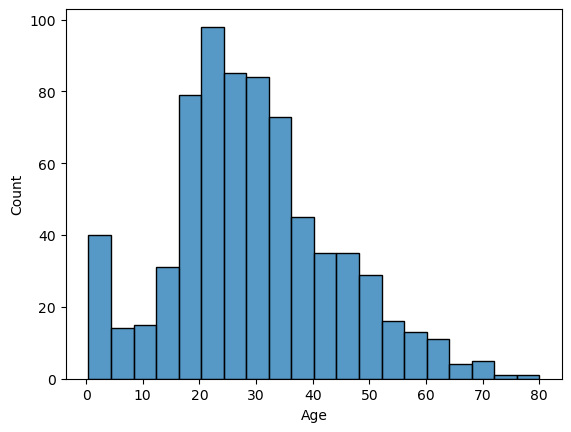

In [385]:
sns.histplot(traindata.Age)

In [386]:
traindata.Age.median()

28.0

# Transofor and encode

In [473]:
testdata['Sex'] = pd.get_dummies(testdata['Sex'], drop_first=True)

<Axes: xlabel='Sex', ylabel='Count'>

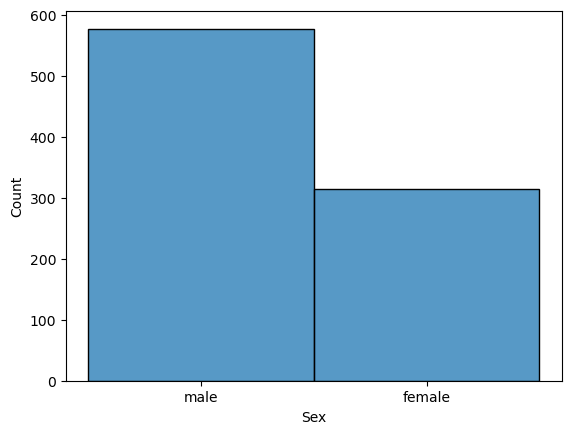

In [475]:
sns.histplot(traindata.Sex)

In [477]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Create model

In [487]:
y= traindata.Survived

y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [495]:
x = traindata.drop(['Survived'], axis=1)

In [497]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [503]:
clean (traindata)

KeyError: "['Cabin', 'Name', 'Embarked', 'Fare', 'Ticket'] not found in axis"

In [517]:
x['Sex'] = pd.get_dummies(x['Sex'], drop_first=True)


In [519]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,1,3,True,22.0,1,0
1,2,1,False,38.0,1,0
2,3,3,False,26.0,0,0
3,4,1,False,35.0,1,0
4,5,3,True,35.0,0,0
...,...,...,...,...,...,...
886,887,2,True,27.0,0,0
887,888,1,False,19.0,0,0
888,889,3,False,28.0,1,2
889,890,1,True,26.0,0,0


In [521]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = .8)

In [523]:
model1 = DecisionTreeClassifier()
model1.fit(x_train, y_train)

DecisionTreeClassifier()

In [536]:
pre = model1.predict(x_test)

In [538]:
accuracy_score(pre, y_test)

0.7821229050279329

In [554]:
accuracies = []

In [568]:
def all(model):
    model.fit(x_train, y_train)
    pre = model.predict(x_test)
    
    accuracy_score(pre, y_test)
    accuracy = accuracy_score(pre, y_test)
    print ('Accuracy is: ', accuracy)
    accuracies.append(accuracy)

In [570]:

model1 = LogisticRegression()

In [572]:

all(model1)

Accuracy is:  0.8156424581005587


C:\Users\Zaher1\anaconda3\anaconda\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [574]:
accuracies

[0.8156424581005587]

In [576]:
model2= RandomForestClassifier()
all (model2)

Accuracy is:  0.776536312849162


In [578]:
model3 = GradientBoostingClassifier()
all (model3)

Accuracy is:  0.8212290502793296


In [582]:
model4 = KNeighborsClassifier()
all (model4)

Accuracy is:  0.5642458100558659


In [586]:
model5= GaussianNB()
all (model5)

Accuracy is:  0.770949720670391


In [588]:
model6= SVC()
all (model6)

Accuracy is:  0.5810055865921788


In [590]:
model7 = DecisionTreeClassifier()
all(model7)

Accuracy is:  0.7486033519553073


In [598]:
Algorithm = ['RandomForestClassifier','DecisionTreeClassifier','SVC','KNeighborsClassifier', 
             'GradientBoostingClassifier', 'GaussianNB', 'LogisticRegression' ]

In [602]:
new = pd.DataFrame({'Algorithm' : Algorithm, 'accuracies': accuracies})

In [604]:
new

,Algorithm,accuracies
0,RandomForestClassifier,0.815642
1,DecisionTreeClassifier,0.776536
2,SVC,0.821229
3,KNeighborsClassifier,0.564246
4,GradientBoostingClassifier,0.770950
5,GaussianNB,0.581006
6,LogisticRegression,0.748603


In [606]:
modelx = GradientBoostingClassifier()
modelx.fit(x_train, y_train)

GradientBoostingClassifier()

In [608]:
testdata

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",True,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",False,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",True,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",True,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",False,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",True,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",False,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",True,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",True,NaN,0,0,359309,8.0500,NaN,S


In [610]:
testdata.drop(['Cabin', 'Name', 'Embarked', 'Fare', 'Ticket'],axis=1, inplace= True) 

In [612]:
testdata

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,True,34.5,0,0
1,893,3,False,47.0,1,0
2,894,2,True,62.0,0,0
3,895,3,True,27.0,0,0
4,896,3,False,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,True,NaN,0,0
414,1306,1,False,39.0,0,0
415,1307,3,True,38.5,0,0
416,1308,3,True,NaN,0,0


In [636]:
testdata.Age = testdata.Age.fillna(testdata.Age.median())

In [638]:
pre= modelx.predict(testdata)

In [642]:
final = testdata.PassengerId

In [644]:
final

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [652]:
newdata = pd.DataFrame({'PassengerId' : final, 'Survived': pre})

In [654]:
newdata.to_csv('submis.csv', index = False)